### Load Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
sns.set() 

### Prepare/collect data

In [ ]:
import os
path ="/content/drive/MyDrive/brain tumor big data set/Training"
dir_list = os.listdir(path)
classes = {'no_tumor':0, 'pituitary_tumor':1,'meningioma_tumor':2}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = "/content/drive/MyDrive/brain tumor big data set/Training/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls]) 

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1, 2])

In [ ]:
pd.Series(Y).value_counts()

0    1595
1    1457
2    1339
dtype: int64

In [ ]:
X.shape, X_updated.shape

((4391, 200, 200), (4391, 40000))

### Visualize data

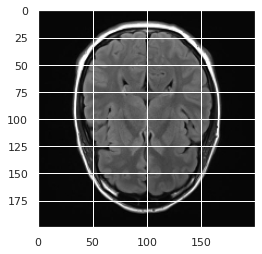

In [ ]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(4391, 40000)

### Split Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [ ]:
xtrain.shape, xtest.shape

((3073, 40000), (1318, 40000))

### Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(3073, 40000) (1318, 40000)


### Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8952959028831563


In [ ]:
lg.fit(xtrain, ytrain)
y_pred1 = lg.predict(xtest)
#print(y_pred1)
print('Accuracy:', accuracy_score(ytest, y_pred1))

Accuracy: 0.8952959028831563


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.962251871135698
Testing Score: 0.9089529590288316


In [ ]:
sv.fit(xtrain, ytrain)
y_pred2 = sv.predict(xtest)
#print(y_pred1)
print('Accuracy:', accuracy_score(ytest, y_pred2))

Accuracy: 0.9089529590288316


### Prediction

In [ ]:
pred = sv.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   1,   11,   42,   45,   60,   70,   72,   80,   90,   94,   98,
         105,  113,  123,  124,  131,  137,  144,  145,  146,  150,  156,
         167,  170,  186,  218,  220,  226,  234,  267,  273,  286,  299,
         301,  304,  305,  308,  319,  333,  334,  346,  352,  355,  359,
         367,  380,  385,  417,  420,  431,  433,  441,  447,  465,  477,
         501,  504,  517,  522,  530,  539,  550,  574,  599,  603,  625,
         642,  667,  670,  678,  700,  707,  734,  738,  751,  759,  760,
         764,  822,  830,  835,  842,  844,  853,  865,  869,  871,  872,
         926,  932,  988, 1014, 1020, 1030, 1053, 1069, 1080, 1087, 1122,
        1126, 1131, 1134, 1138, 1161, 1173, 1179, 1190, 1192, 1194, 1205,
        1206, 1210, 1218, 1247, 1249, 1275, 1276, 1282, 1299, 1303]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  120
0 0


### TEST MODEL

In [ ]:
dec = {0:'No Tumor', 1:'Pituitary Tumor',2:'meningioma_tumor'}

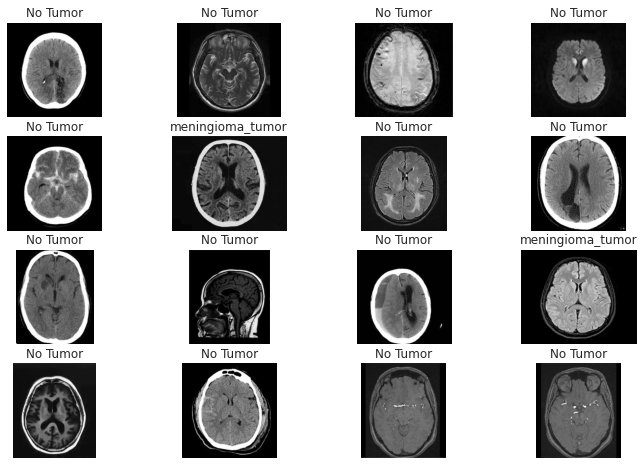

In [ ]:
plt.figure(figsize=(12,8))
path1 ="/content/drive/MyDrive/brain tumor big data set/Testing"
p= os.listdir(path1)
c=1
for i in os.listdir('/content/drive/MyDrive/brain tumor big data set/Testing/no_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/brain tumor big data set/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

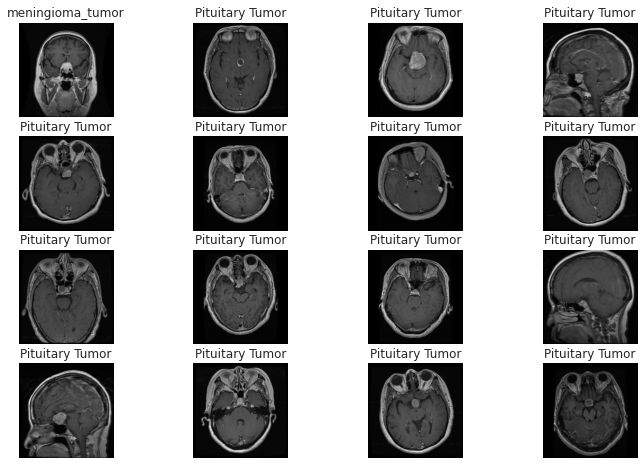

In [ ]:
plt.figure(figsize=(12,8))
path1 ="/content/drive/MyDrive/brain tumor big data set/Testing"
p= os.listdir(path1)
c=1
for i in os.listdir('/content/drive/MyDrive/brain tumor big data set/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/brain tumor big data set/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

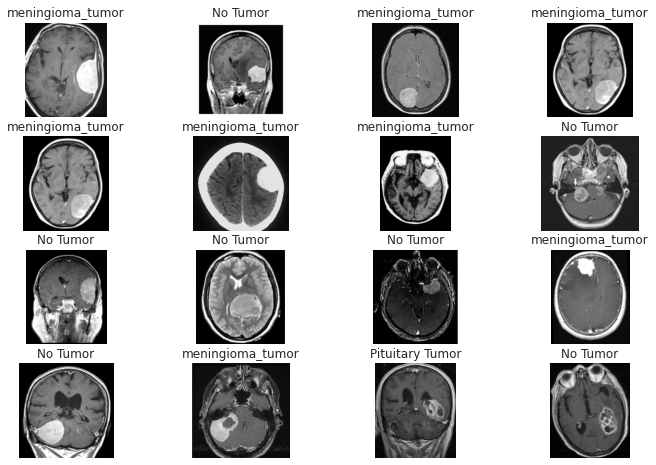

In [ ]:
plt.figure(figsize=(12,8))
path1 ="/content/drive/MyDrive/brain tumor big data set/Testing"
p= os.listdir(path1)
c=1
for i in os.listdir('/content/drive/MyDrive/brain tumor big data set/Testing/meningioma_tumor')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/brain tumor big data set/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

(-0.5, 349.5, 392.5, -0.5)

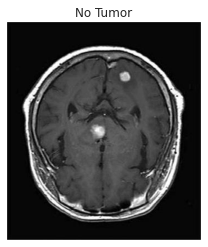

In [ ]:
#check
img = cv2.imread('/content/drive/MyDrive/brain tumor big data set/Testing/my_samples/mysamples (103).jpg',0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')